In [16]:
# Author: Yilin Zheng

# import necessary libraries
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# visuals.py is a supplementary for data visualization
import visuals as vs

%matplotlib inline
# read data
X_train = pd.read_table('train.txt', delim_whitespace=True, header=None, skip_blank_lines=True)
# shuffle data
X_train = X_train.sample(frac=1).reset_index(drop=True)
# split out lables
y_train = X_train.pop(X_train.columns[-1])

# test data and labels
X_test = pd.read_table('test.txt', delim_whitespace=True, header=None, skip_blank_lines=True)
X_test = X_test.sample(frac=1).reset_index(drop=True)
y_test = X_test.pop(X_test.columns[-1])

print("X train has {} sample".format(X_train.shape[0]))
print("X test has {} sample".format(X_test.shape[0]))
print("y train has {} sample".format(len(y_train)))
print("y test has {} sample".format(len(y_test)))

display(X_train.head(n=10))
display(y_train.head(n=10))

X train has 299 sample
X test has 3 sample
y train has 299 sample
y test has 3 sample


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.0,9.0,39.0,150.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.0,8.5,0.0,0.1
1,2.0,1.0,38.2,42.0,26.0,1.0,1.0,1.0,1.0,3.0,...,2.0,0.0,0.0,0.0,1.0,0.0,36.0,6.9,0.0,0.0
2,2.0,1.0,37.9,72.0,0.0,1.0,1.0,5.0,2.0,3.0,...,1.0,1.0,3.0,2.0,3.0,4.0,58.0,74.0,1.0,2.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,1.0,1.0,0.0,0.0,5.0,35.0,58.0,2.0,1.0
4,1.0,1.0,0.0,52.0,28.0,3.0,3.0,4.0,1.0,3.0,...,3.0,2.0,1.0,0.0,4.0,4.0,37.0,8.1,0.0,0.0
5,2.0,1.0,38.5,60.0,0.0,2.0,2.0,1.0,1.0,1.0,...,2.0,2.0,1.0,0.0,1.0,1.0,44.0,7.7,0.0,0.0
6,1.0,1.0,0.0,70.0,36.0,1.0,0.0,3.0,2.0,2.0,...,2.0,2.0,0.0,0.0,4.0,5.0,36.0,7.3,0.0,0.0
7,2.0,1.0,38.0,40.0,25.0,0.0,1.0,1.0,1.0,4.0,...,2.0,1.0,1.0,0.0,4.0,0.0,37.0,69.0,0.0,0.0
8,2.0,1.0,38.0,54.0,30.0,2.0,3.0,3.0,3.0,3.0,...,2.0,2.0,2.0,0.0,0.0,4.0,45.0,6.2,0.0,0.0
9,1.0,1.0,38.0,76.0,18.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71.0,11.0,0.0,0.0


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: 21, dtype: float64

In [17]:
# Apply decision tree from sklearn
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# bete = 1
fbeta = fbeta_score(y_test, y_pred, beta=1)

print("Accuracy: {:.3f}".format(accuracy))

print("Precision: {:.3f}".format(precision))

print("Recall: {:.3f}".format(recall))

print("F-beta: {:.3f}".format(fbeta))

Accuracy: 0.333
Precision: 0.500
Recall: 0.500
F-beta: 0.500


In [20]:
# C4.5
from C45 import C45

dataset = pd.read_table('train.txt', delim_whitespace=True, header=None, skip_blank_lines=True)
# display(dataset)

labels = dataset.columns.values.tolist()
dataset = list(dataset.values.tolist())
continus_features = [2, 3, 4, 14, 17, 18, 20]

dt = C45()
tree = dt.fit(dataset, labels, continus_features)
display(tree)

{20: {0: {18: {0: {16: {0.0: {7: {0.0: {8: {0.0: {4: {24: 1.0,
            0: {2: {0: {0: {1.0: {21: {0.0: 0.0, 1.0: 1.0}}, 2.0: 1.0}},
              37: 0.0}},
            96: 0.0,
            12: 0.0}},
          1.0: 1.0,
          2.0: 1.0}},
        1.0: 1.0,
        2.0: 0.0,
        5.0: 0.0,
        6.0: {0: {1.0: 1.0, 2.0: 0.0}}}},
      3.0: 1.0,
      4.0: 1.0,
      5.0: {8: {0.0: 0.0, 1.0: 1.0, 2.0: 0.0}}}},
    3: 0.0,
    4: {15: {0.0: 0.0, 1.0: 1.0, 3.0: 0.0, 4.0: 1.0}},
    5: {17: {35: 1.0,
      36: 1.0,
      37: 0.0,
      39: 1.0,
      40: 1.0,
      41: 0.0,
      43: 1.0,
      46: 0.0,
      53: 0.0,
      28: 1.0}},
    6: {17: {0: {2: {0: 1.0, 39: 0.0}},
      23: 1.0,
      24: 1.0,
      33: {12: {0.0: 1.0, 1.0: 0.0}},
      34: 1.0,
      35: {2: {37: 0.0, 38: 1.0}},
      36: 1.0,
      37: {1: {9.0: 0.0, 1.0: 1.0}},
      38: {2: {0: 0.0, 38: 1.0}},
      39: 1.0,
      40: {0: {1.0: 1.0, 2.0: 0.0}},
      41: 1.0,
      42: 1.0,
      43: 1.0,
      44

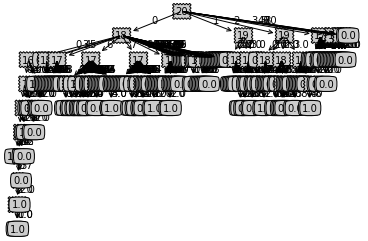

In [19]:
import treePlotter
treePlotter.createPlot(tree)